In [23]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# plan: first get temperature, then add cyclone data on top. then third one can just be temperature and US tornados. [or maybe add on to the plot? revisit...]



In [24]:
# temperature - source: https://data.giss.nasa.gov/gistemp/
#Combined Land-Surface Air and Sea-Surface Water Temperature Anomalies (Land-Ocean Temperature Index, L-OTI)
#Global-mean monthly, seasonal, and annual means, 1880-present, updated through most recent month:

temp = pd.read_csv("https://raw.githubusercontent.com/gsteinmetzsilber/DATA-608/main/Story%205/Data/GISTEMP%20-%20temp.csv")
print(temp.head())
print(temp.shape)



                                                                                          Land-Ocean: Global Means
Year Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec  J-D  D-N  DJF  MAM  JJA                       SON
1880 -.17 -.24 -.08 -.16 -.09 -.20 -.17 -.10 -.13 -.23 -.21 -.17 -.16 ***  ***  -.11 -.16                     -.19
1881 -.19 -.13 .04  .06  .06  -.18 .01  -.03 -.15 -.21 -.18 -.07 -.08 -.09 -.16 .05  -.07                     -.18
1882 .17  .14  .04  -.16 -.14 -.23 -.16 -.07 -.14 -.23 -.16 -.35 -.11 -.08 .08  -.09 -.15                     -.18
1883 -.29 -.36 -.12 -.18 -.17 -.08 -.06 -.13 -.21 -.10 -.22 -.10 -.17 -.19 -.33 -.15 -.09                     -.18
(146, 1)


In [25]:
#it's apparently one column, I think bc the title is a line above the header? Let's see...

temp = pd.read_csv("https://raw.githubusercontent.com/gsteinmetzsilber/DATA-608/main/Story%205/Data/GISTEMP%20-%20temp.csv", skiprows=1)
print(temp.head())
print(temp.shape)
print(temp.dtypes)


   Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov  \
0  1880 -0.17 -0.24  -.08  -.16  -.09  -.20  -.17  -.10  -.13  -.23  -.21   
1  1881 -0.19 -0.13   .04   .06   .06  -.18   .01  -.03  -.15  -.21  -.18   
2  1882  0.17  0.14   .04  -.16  -.14  -.23  -.16  -.07  -.14  -.23  -.16   
3  1883 -0.29 -0.36  -.12  -.18  -.17  -.08  -.06  -.13  -.21  -.10  -.22   
4  1884 -0.12 -0.07  -.35  -.39  -.33  -.35  -.29  -.27  -.26  -.24  -.33   

    Dec   J-D   D-N   DJF   MAM   JJA   SON  
0  -.17  -.16   ***   ***  -.11  -.16  -.19  
1  -.07  -.08  -.09  -.16   .05  -.07  -.18  
2  -.35  -.11  -.08   .08  -.09  -.15  -.18  
3  -.10  -.17  -.19  -.33  -.15  -.09  -.18  
4  -.30  -.28  -.26  -.10  -.36  -.30  -.28  
(145, 19)
Year      int64
Jan     float64
Feb     float64
Mar      object
Apr      object
May      object
Jun      object
Jul      object
Aug      object
Sep      object
Oct      object
Nov      object
Dec      object
J-D      object
D-N      object
DJF      ob

In [26]:
#much better, although the columns shouldn't be objects, they should all be floats except for year

for column in temp.columns:
    if column != "Year":
        temp[column] = pd.to_numeric(temp[column], errors="coerce")

print(temp.dtypes) #check 


Year      int64
Jan     float64
Feb     float64
Mar     float64
Apr     float64
May     float64
Jun     float64
Jul     float64
Aug     float64
Sep     float64
Oct     float64
Nov     float64
Dec     float64
J-D     float64
D-N     float64
DJF     float64
MAM     float64
JJA     float64
SON     float64
dtype: object


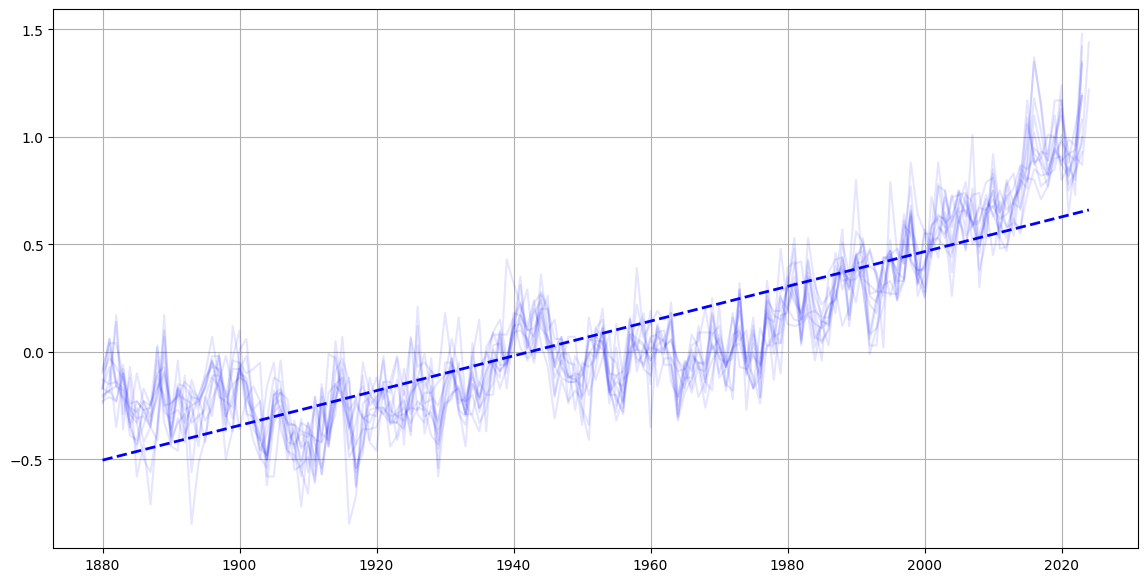

In [27]:
# now I can plot, let's disregard those seasonal columns, and just plot 
# also want a best fit line to show upward trend 

from scipy.stats import linregress

temp["mean_anom"] = temp.iloc[:, 1:13].mean(axis=1) #averaging each row's monthly values 
slope, intercept, r_value, p_value, std_err = linregress(temp["Year"], temp["mean_anom"])
best_fit = intercept + slope * temp["Year"]

plt.figure(figsize=(14, 7)) 

for month in temp.columns[1:13]:
    plt.plot(temp["Year"], temp[month], marker="", linestyle="-", color="blue", alpha=0.1) #keep alpha low so best-fit will be more salient 
plt.plot(temp["Year"], best_fit, color="blue", linestyle='--', linewidth=2)

plt.grid(True)




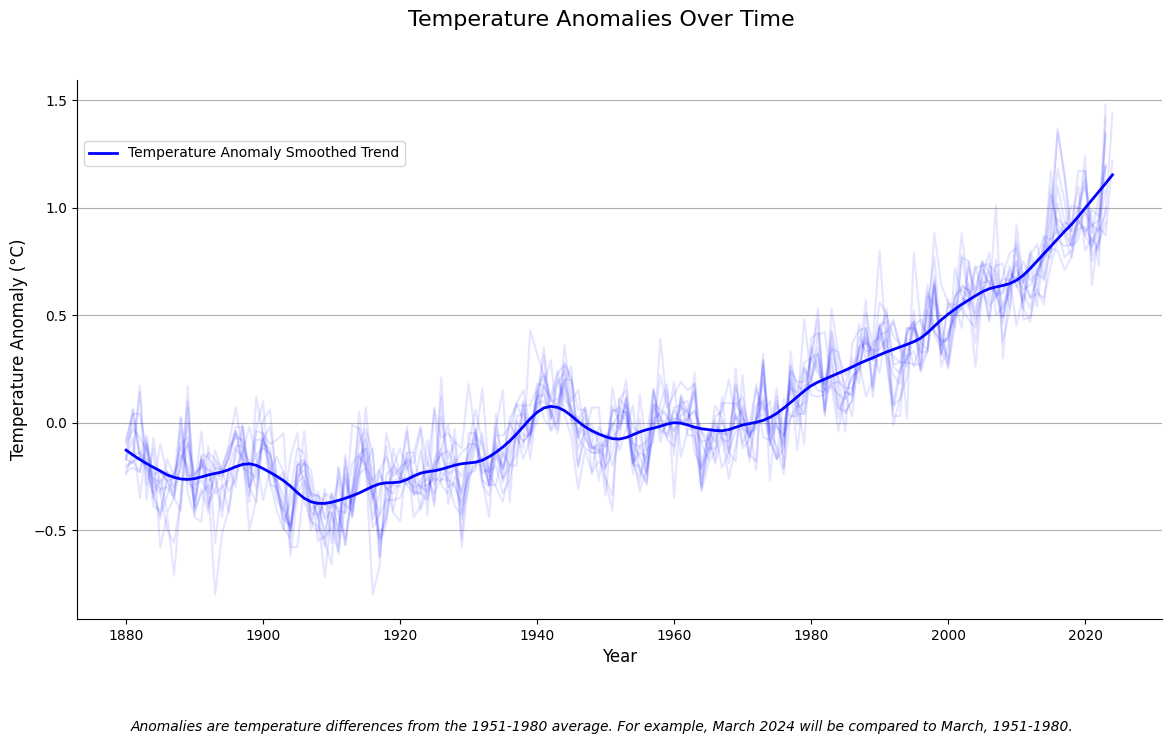

In [28]:
#it's actually pretty nice, I just don't love the LINE of best fit...it's not really linear
#I'll try a LOESS curve, I think I can just explain it to high schoolers as "a line capturing the overall trend"

from statsmodels.nonparametric.smoothers_lowess import lowess
loess_smoothed = lowess(temp["mean_anom"], temp["Year"], frac=0.1)

smoothed_years = loess_smoothed[:, 0] #extracting smoothed years
smoothed_values = loess_smoothed[:, 1] # and the smoothed values 

plt.figure(figsize=(14, 7))
for month in temp.columns[1:13]:
    plt.plot(temp["Year"], temp[month], marker="", linestyle="-", color="blue", alpha=0.1) 
plt.plot(smoothed_years, smoothed_values, color="blue", linestyle='-', linewidth=2, label="Temperature Anomaly Smoothed Trend")

plt.suptitle("Temperature Anomalies Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Temperature Anomaly (°C)", fontsize=12)

#plt.axhline(0, color="black", linewidth=0.5, linestyle="--") # reference line at y = 0 

ax = plt.gca()  
ax.legend(loc="upper left", bbox_to_anchor=(0, 0.9)) #moving down a tiny bit 

plt.grid(True, axis="y") #use this method in the future, so efficient 
plt.figtext(0.5, -0.05, "Anomalies are temperature differences from the 1951-1980 average. For example, March 2024 will be compared to March, 1951-1980.", ha="center", fontsize=10, style="italic")

#let's try removing the spines, might look cleaner
ax = plt.gca()  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
#ax.spines["bottom"].set_visible(False) 
#ax.spines["left"].set_visible(False)   
plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


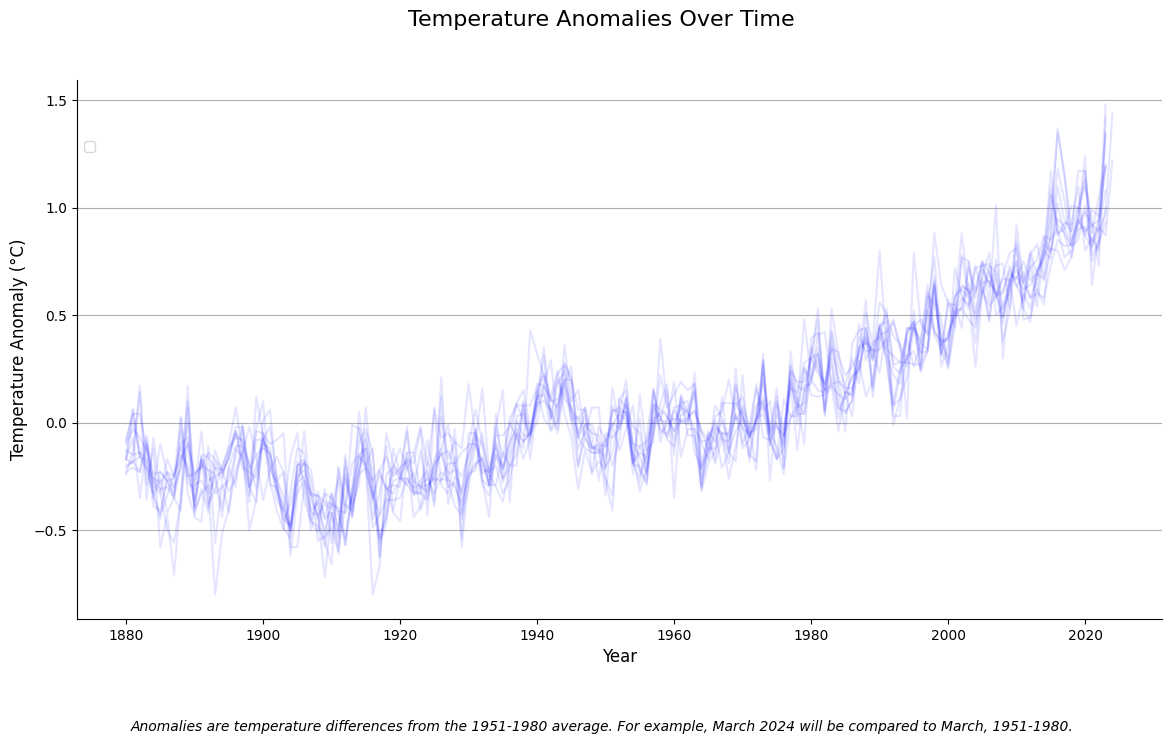

In [29]:

plt.figure(figsize=(14, 7))
for month in temp.columns[1:13]:
    plt.plot(temp["Year"], temp[month], marker="", linestyle="-", color="blue", alpha=0.1) 

plt.suptitle("Temperature Anomalies Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Temperature Anomaly (°C)", fontsize=12)

#plt.axhline(0, color="black", linewidth=0.5, linestyle="--") # reference line at y = 0 

ax = plt.gca()  
ax.legend(loc="upper left", bbox_to_anchor=(0, 0.9)) #moving down a tiny bit 

plt.grid(True, axis="y") #use this method in the future, so efficient 
plt.figtext(0.5, -0.05, "Anomalies are temperature differences from the 1951-1980 average. For example, March 2024 will be compared to March, 1951-1980.", ha="center", fontsize=10, style="italic")

#let's try removing the spines, might look cleaner
ax = plt.gca()  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
#ax.spines["bottom"].set_visible(False) 
#ax.spines["left"].set_visible(False)   
plt.show()



In [30]:
# now let's add cyclones 

from xml.etree import ElementTree as ET
import requests

response = requests.get("https://raw.githubusercontent.com/gsteinmetzsilber/DATA-608/main/Story%205/Data/cyclones.xml")
root = ET.fromstring(response.content)

cyclone_counts = {}
for row in root.findall("row"):
    year = row.find("Year").text
    if year in cyclone_counts:
        cyclone_counts[year] += 1
    else:
        cyclone_counts[year] = 1 #initalize counter

cyclone_counts

cyclones_df = pd.DataFrame(list(cyclone_counts.items()), columns = ["Year", "cyclone_count"]) #turn it into a list of tuples, then a df 
print(cyclones_df.dtypes)


Year             object
cyclone_count     int64
dtype: object


In [31]:
#need to convert year to numeric 
cyclones_df["Year"] = pd.to_numeric(cyclones_df["Year"])
cyclones_df.sort_values("Year", inplace=True) #sort by year 

#just out of curiousity: 
print(cyclones_df["cyclone_count"].describe())


count    66.000000
mean     22.227273
std      13.536044
min       3.000000
25%       9.000000
50%      24.500000
75%      34.000000
max      51.000000
Name: cyclone_count, dtype: float64


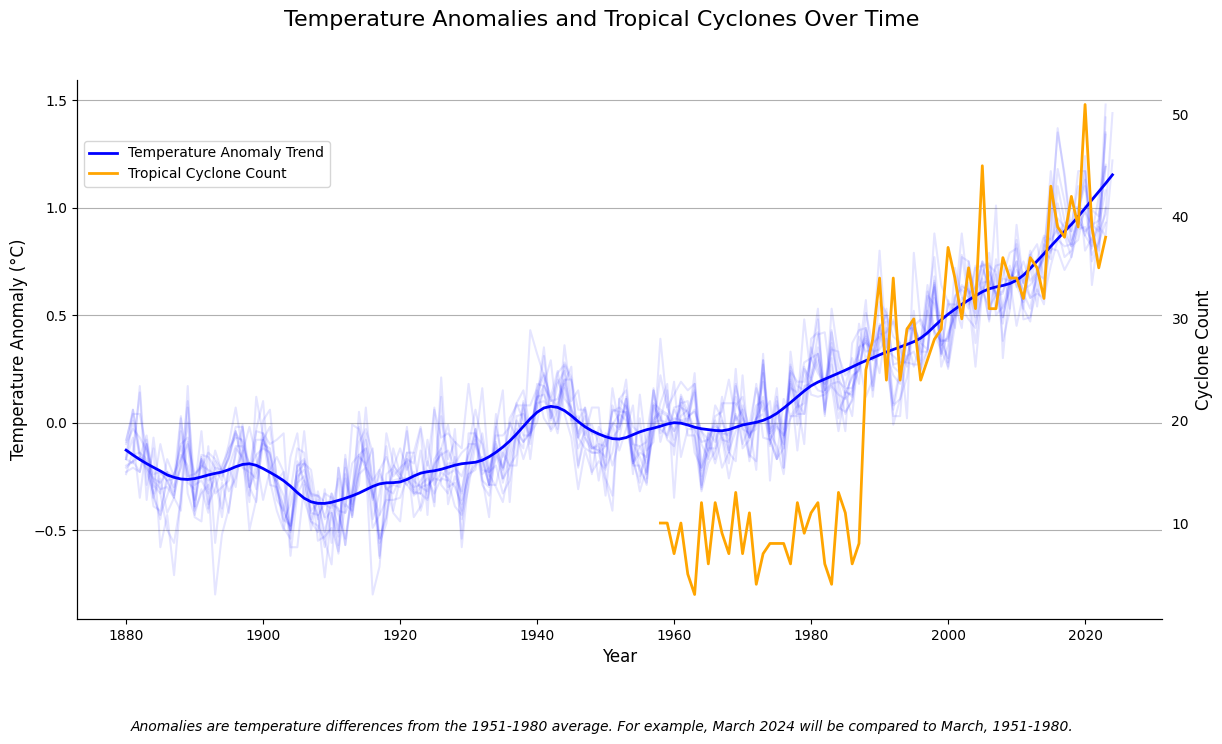

In [32]:
loess_smoothed = lowess(temp["mean_anom"], temp["Year"], frac=0.1)

smoothed_years = loess_smoothed[:, 0] #extracting smoothed years
smoothed_values = loess_smoothed[:, 1] # and the smoothed values 

plt.figure(figsize=(14, 7))
for month in temp.columns[1:13]:
    plt.plot(temp["Year"], temp[month], marker="", linestyle="-", color="blue", alpha=0.1) 
plt.plot(smoothed_years, smoothed_values, color="blue", linestyle='-', linewidth=2, label="Temperature Anomaly Trend")

plt.suptitle("Temperature Anomalies and Tropical Cyclones Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Temperature Anomaly (°C)", fontsize=12)

plt.grid(True, axis="y") #use this method in the future, so efficient 
plt.figtext(0.5, -0.05, "Anomalies are temperature differences from the 1951-1980 average. For example, March 2024 will be compared to March, 1951-1980.", ha="center", fontsize=10, style="italic")

#let's try removing the spines, might look cleaner
ax = plt.gca()  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)


#now we add the cyclone content
ax2 = plt.gca().twinx() # second axis 

ax2.plot(cyclones_df["Year"], cyclones_df["cyclone_count"], label="Tropical Cyclone Count", color="orange", linestyle="-", linewidth=2)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="upper left", bbox_to_anchor=(0, 0.9))
ax2.set_ylabel("Cyclone Count", fontsize=12)

ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)

ax2.tick_params(right=False) #because it looks like negative numbers otherwise

plt.show()



In [33]:
# now let's add the final df 

tornadoes_df = pd.read_csv("https://raw.githubusercontent.com/gsteinmetzsilber/DATA-608/main/Story%205/Data/1950-2022_actual_tornadoes.csv")
print(tornadoes_df.head())
print(tornadoes_df.shape)
print(tornadoes_df.dtypes)


    om    yr  mo  dy        date      time  tz  st  stf  stn  ...   len  wid  \
0  192  1950  10   1  1950-10-01  21:00:00   3  OK   40   23  ...  15.8   10   
1  193  1950  10   9  1950-10-09  02:15:00   3  NC   37    9  ...   2.0  880   
2  195  1950  11  20  1950-11-20  02:20:00   3  KY   21    1  ...   0.1   10   
3  196  1950  11  20  1950-11-20  04:00:00   3  KY   21    2  ...   0.1   10   
4  197  1950  11  20  1950-11-20  07:30:00   3  MS   28   14  ...   2.0   37   

   ns  sn  sg   f1  f2  f3  f4  fc  
0   1   1   1   25   0   0   0   0  
1   1   1   1   47   0   0   0   0  
2   1   1   1  177   0   0   0   0  
3   1   1   1  209   0   0   0   0  
4   1   1   1  101   0   0   0   0  

[5 rows x 29 columns]
(68701, 29)
om         int64
yr         int64
mo         int64
dy         int64
date      object
time      object
tz         int64
st        object
stf        int64
stn        int64
mag        int64
inj        int64
fat        int64
loss     float64
closs    float64
slat   

In [34]:
# we just want annual counts..
tornadoes_df.rename(columns={"yr": "Year"}, inplace=True) #less room for error

annual_tornadoes = tornadoes_df.groupby("Year").size()
annual_tornadoes_df = annual_tornadoes.reset_index(name="tornado_count")
annual_tornadoes_df.head()


,Year,tornado_count
0,1950,201
1,1951,260
2,1952,240
3,1953,421
4,1954,550


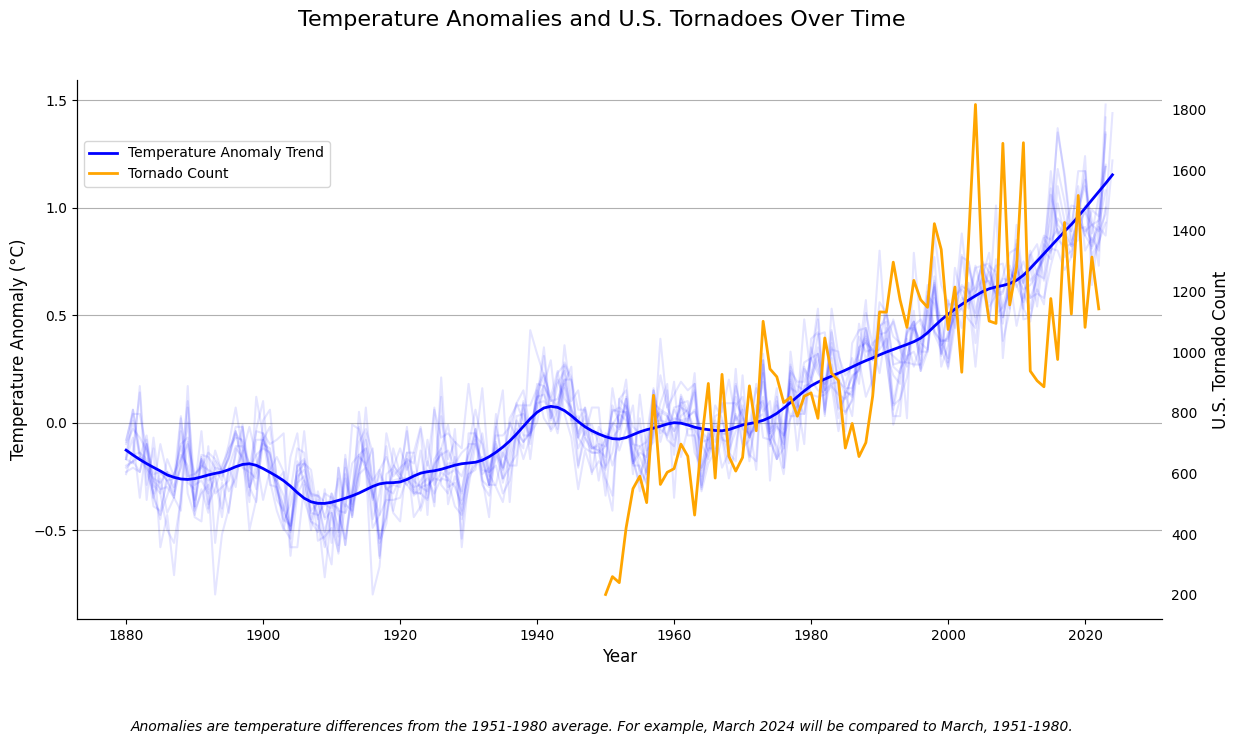

In [35]:
#obviously the scale is way different than the cyclones...
#we'll just have two plots and the parallel nature allows us to put them side by side
#1. temp & cyclones over time
#2. temp & tornadoes over time

loess_smoothed = lowess(temp["mean_anom"], temp["Year"], frac=0.1)

smoothed_years = loess_smoothed[:, 0] #extracting smoothed years
smoothed_values = loess_smoothed[:, 1] # and the smoothed values 

plt.figure(figsize=(14, 7))
for month in temp.columns[1:13]:
    plt.plot(temp["Year"], temp[month], marker="", linestyle="-", color="blue", alpha=0.1) 
plt.plot(smoothed_years, smoothed_values, color="blue", linestyle='-', linewidth=2, label="Temperature Anomaly Trend")

plt.suptitle("Temperature Anomalies and U.S. Tornadoes Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Temperature Anomaly (°C)", fontsize=12)

plt.grid(True, axis="y") #use this method in the future, so efficient 
plt.figtext(0.5, -0.05, "Anomalies are temperature differences from the 1951-1980 average. For example, March 2024 will be compared to March, 1951-1980.", ha="center", fontsize=10, style="italic")

#let's try removing the spines, might look cleaner
ax = plt.gca()  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)


#now we add the tornado content
ax2 = plt.gca().twinx() # second axis 

ax2.plot(annual_tornadoes_df["Year"], annual_tornadoes_df["tornado_count"], label="Tornado Count", color="orange", linestyle="-", linewidth=2)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="upper left", bbox_to_anchor=(0, 0.9))
ax2.set_ylabel("U.S. Tornado Count", fontsize=12)

ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)

ax2.tick_params(right=False) #because it looks like negative numbers otherwise

plt.show()



 
